#**Neural Network Regression with TensorFlow**

##**Steps in Modeliing**

**Create some custom data for regression.**

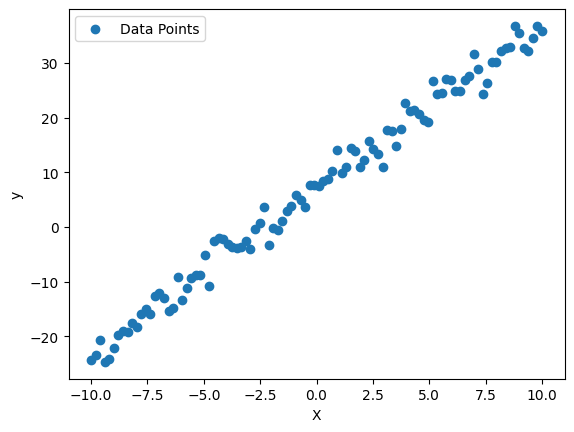

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

X=np.linspace(-10,10,100)
y=3*X+7+np.random.normal(0,2,100)

plt.scatter(X,y,label="Data Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**Build a simple neural network.**

In [9]:
model=Sequential([
    Dense(10,activation='relu',input_shape=(1,)),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model by defining a loss function, optimizer, and metrics.t**

In [10]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

**Train the model to find patterns in the data.**

In [13]:
history=model.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3936 - mae: 1.8620 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6369 - mae: 1.7071 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9197 - mae: 1.7162 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4850 - mae: 1.6681 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7045 - mae: 1.7202 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4399 - mae: 1.6697 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4506 - mae: 1.6840 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2384 - mae: 1.6306 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6295 - mae: 1.7361 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0623 - mae: 1.5659 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4772 - mae: 1.6931 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1789 - mae: 1.6264 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

**Use the trained model to make predictions.**

In [14]:
prediction=model.predict(np.array([7.0]))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[27.938524]]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


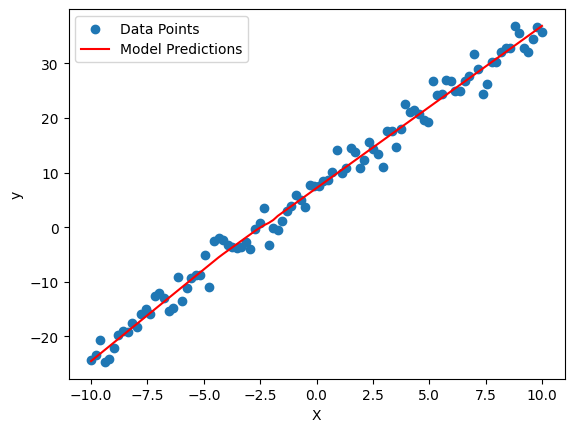

In [15]:
y_pred=model.predict(X)

plt.scatter(X,y,label="Data Points")
plt.plot(X,y_pred,color='red',label="Model Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**Evaluate the Model**

In [16]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y,y_pred)
print(mse)

r2=r2_score(y,y_pred)
print(r2)

3.8905104733550235
0.987635979241429


**Plot of the Model**

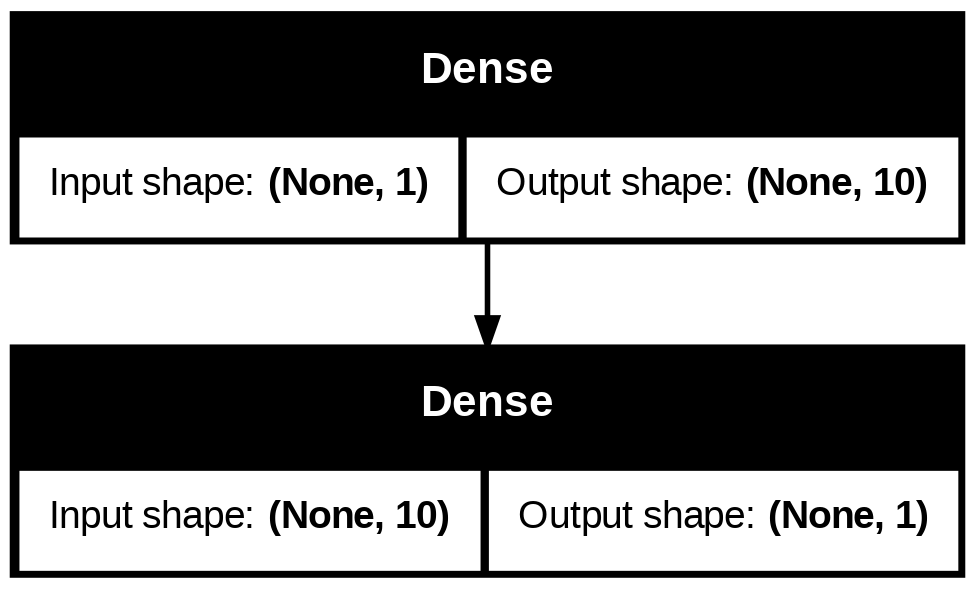

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

**Saving a model** :

 Save the model in the HDF5 format

In [20]:
model.save('model.h5')

**Loading a model**

In [23]:
loaded_h5_model=tf.keras.models.load_model(
    "model.h5",custom_objects={'mse':tf.keras.losses.MeanSquaredError()}
)
prediction=loaded_h5_model.predict(np.array([7.0]))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[27.938524]]
